<a href="https://colab.research.google.com/github/OlgaZukova/22.9.1/blob/master/Week6_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Generating a synthetic dataset
# Set a random seed for reproducibility
np.random.seed(42)
data = {
'R&D Spend': np.random.randint(50000, 200000, 100),
'Administration Spend': np.random.randint(30000, 150000, 100),
'Marketing Spend': np.random.randint(20000, 120000, 100),
'Profit': np.random.randint(50000, 300000, 100)
}
df = pd.DataFrame(data)
# Display basic statistics
print(df.describe())

           R&D Spend  Administration Spend  Marketing Spend         Profit
count     100.000000            100.000000       100.000000     100.000000
mean   122365.400000          95535.910000     68409.790000  176944.220000
std     45071.171615          35604.221649     29638.582476   65442.539546
min     50769.000000          30206.000000     20854.000000   52869.000000
25%     85745.500000          64531.250000     43415.750000  125407.500000
50%    117328.000000          97028.000000     69082.500000  179882.000000
75%    166998.500000         125404.000000     92235.000000  228574.500000
max    199503.000000         149324.000000    118506.000000  298930.000000


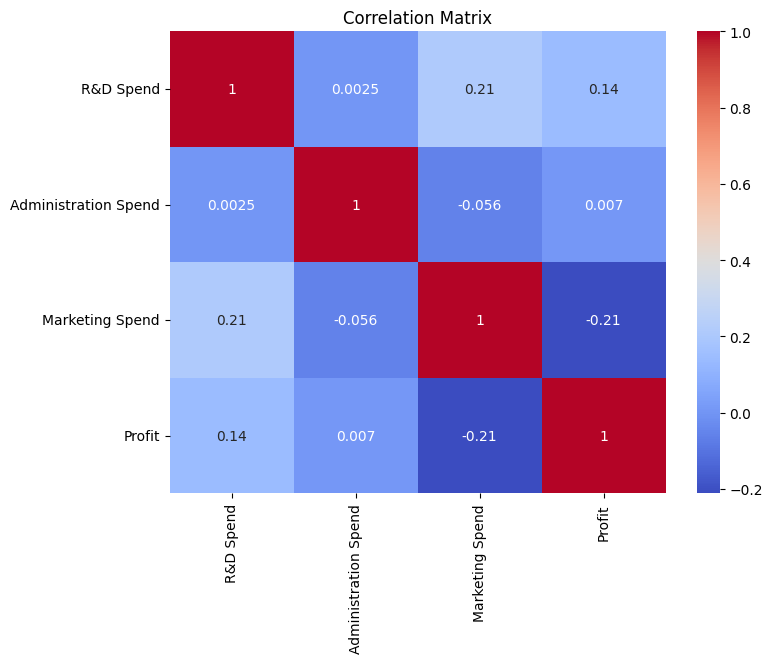

In [ ]:
# Visualize correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Step 2: Data Preparation
#1.Define the target variable (y as Profit) and feature variables (X as R&D Spend, Administration Spend, Marketing Spend).
#2.Split the data into training and testing sets.
X = df[['R&D Spend', 'Administration Spend', 'Marketing Spend']]
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
#Step 3: Train the Model
#1.Initialise and fit a Linear Regression model using training data.
#2.Display the model's coefficients and intercept.
# Initialise and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Display coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 174714.0342087494
Coefficients: [ 0.29870763  0.12919024 -0.64669079]


In [ ]:
#Step 4: Evaluate the Model
#1.Predict profits using the testing set.
#2.Calculate RMSE and R² to assess performance.
# Predict on test set
y_pred = model.predict(X_test)
# Calculate RMSE and R²
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)

RMSE: 4834625740.737413
R²: -0.024469748152023074


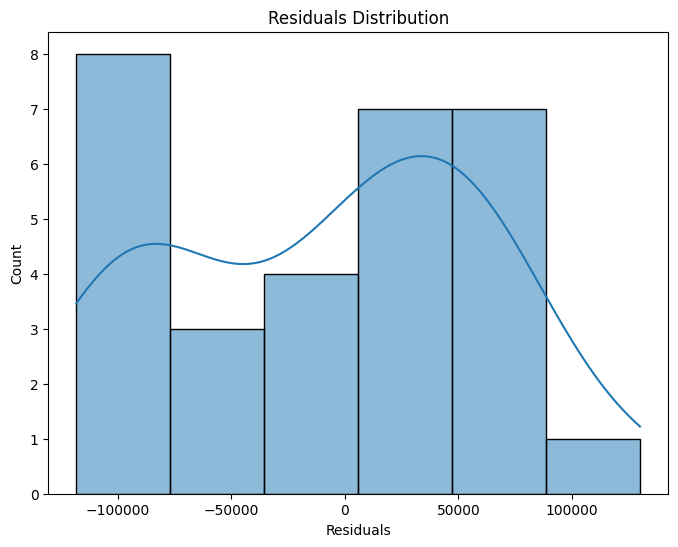

In [ ]:
#Step 5: Residual Analysis
#Plot residuals to check the error distribution.
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()